In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

# 1. Data

1.1 Data Load

In [47]:
from sklearn.datasets import load_iris

iris = load_iris()

data = iris.data
target = iris.target

In [48]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [49]:
 # 0이 아닌값 1과 2 만 사용
target != 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [50]:
data.shape

(150, 4)

In [51]:
# 데이터와 타겟 각각 인덱싱
data = data[target !=0, 2:] # 데이터 3번째, 4번째 변수만 사용
target = target[target != 0]

In [52]:
data.shape

(100, 2)

In [53]:
data = pd.DataFrame(data)
target = pd.DataFrame(target)

In [54]:
data.duplicated() # 데이터 중복 여부 확인

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [55]:
data.loc[data.duplicated()]
# 16번 18번은 중복됨 > 둘 중1개 삭제하는 함수 .duplicated()

,0,1
13,4.7,1.4
16,4.5,1.5
18,4.5,1.5
21,4.0,1.3
22,4.9,1.5
25,4.4,1.4
28,4.5,1.5
29,3.5,1.0
34,4.5,1.5
39,4.0,1.3


In [56]:
# 중복이 아닌값만 반환 > ~ 아니다라는 표시
~data.duplicated()

0     True
1     True
2     True
3     True
4     True
      ... 
95    True
96    True
97    True
98    True
99    True
Length: 100, dtype: bool

In [57]:
# 앞에 2개 변수 버려서 중복값이 있을 수 있음
target = target.loc[~data.duplicated()].values.flatten() # 중복 데이터 버리기 # 왜 flatten 했는지?
data = data.loc[~data.duplicated()].values

In [58]:
# 중복 제거한후 80개만 남음
data.shape

(80, 2)

In [59]:
data[:,0]

array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
       3.6, 4.4, 4.1, 3.9, 4.8, 4.7, 4.3, 4.8, 5. , 3.8, 3.7, 3.9, 5.1,
       4.5, 4.7, 4.4, 4.1, 4.4, 4.6, 4. , 4.2, 4.2, 3. , 6. , 5.1, 5.9,
       5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3,
       5.5, 6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 5.6, 5.8, 6.1,
       6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.4, 5.1, 5.9, 5.7, 5.2, 5. , 5.2,
       5.4, 5.1])

In [60]:
data

array([[4.7, 1.4],
       [4.5, 1.5],
       [4.9, 1.5],
       [4. , 1.3],
       [4.6, 1.5],
       [4.5, 1.3],
       [4.7, 1.6],
       [3.3, 1. ],
       [4.6, 1.3],
       [3.9, 1.4],
       [3.5, 1. ],
       [4.2, 1.5],
       [4. , 1. ],
       [3.6, 1.3],
       [4.4, 1.4],
       [4.1, 1. ],
       [3.9, 1.1],
       [4.8, 1.8],
       [4.7, 1.2],
       [4.3, 1.3],
       [4.8, 1.4],
       [5. , 1.7],
       [3.8, 1.1],
       [3.7, 1. ],
       [3.9, 1.2],
       [5.1, 1.6],
       [4.5, 1.6],
       [4.7, 1.5],
       [4.4, 1.3],
       [4.1, 1.3],
       [4.4, 1.2],
       [4.6, 1.4],
       [4. , 1.2],
       [4.2, 1.3],
       [4.2, 1.2],
       [3. , 1.1],
       [6. , 2.5],
       [5.1, 1.9],
       [5.9, 2.1],
       [5.6, 1.8],
       [5.8, 2.2],
       [6.6, 2.1],
       [4.5, 1.7],
       [6.3, 1.8],
       [5.8, 1.8],
       [6.1, 2.5],
       [5.1, 2. ],
       [5.3, 1.9],
       [5.5, 2.1],
       [5. , 2. ],
       [5.1, 2.4],
       [5.3, 2.3],
       [5.5,

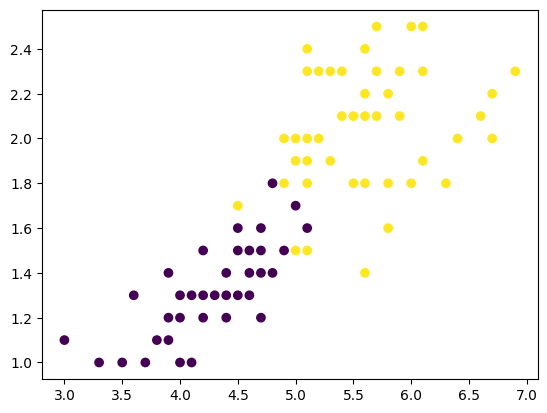

In [61]:
# target 은 2가지 타겟에서 색 분류해줌
plt.scatter(data[:,0], data[:, 1], c=target)

1.2 시각화 데이터

In [62]:
# 영역을 시각화 하기 위한 데이터 사전 생성
# 왜 -1, +1을 하는건지? > 최대값과 최소값 간격을 넓혀주기 위함!
# 
x_min, x_max = data[:,0].min()-1, data[:,0].max()+1
y_min, y_max = data[:,1].min()-1, data[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

2. k 값에 따른 결정 경계

In [63]:
from sklearn.neighbors import KNeighborsClassifier

k 값에 따른 knn의 결정경계를 그려봄\
k 가 작을수록 overfitting이 k가 클수록 underfitting이 됨



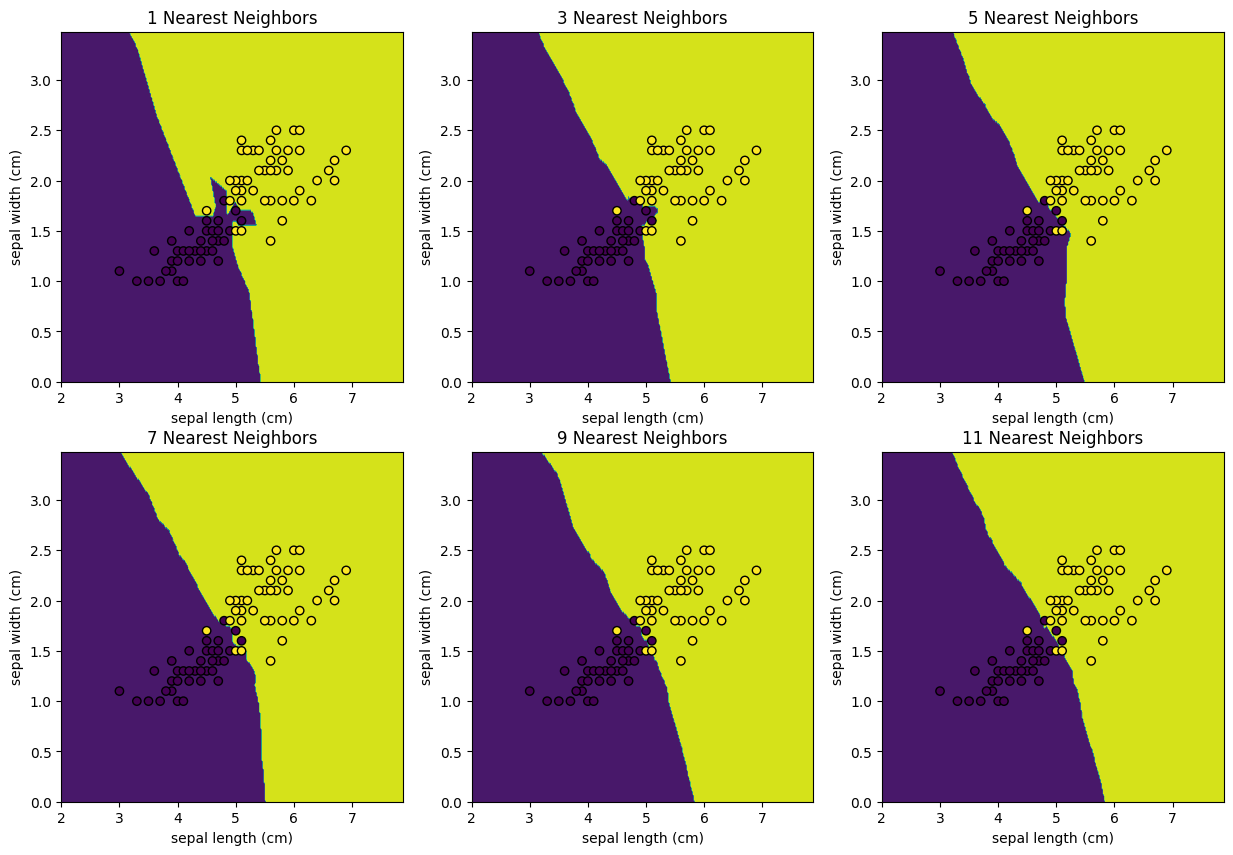

In [64]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(15,10))

for idx, n in enumerate(range(1,12,2)):
  # knn 생성 및 학습
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(data, target)

  # 시각화 데이터 예측
  Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  ax = axes[idx//3, idx%3]

  # 영역표시
  ax.contourf(xx, yy, Z)

  # 데이터 표시
  ax.scatter(
      data[:, 0], data[:,1], c=target, alpha=1.0, edgecolor="black"

  )

  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xlabel(iris.feature_names[0])
  ax.set_ylabel(iris.feature_names[1])
  ax.set_title(f"{n} Nearest Neighbors")

  # k(k=1) 값이 너무 작으면 오버피팅, k(k=11)커지면 언더피팅 발생

# 3. 나의 가장 가까운 이웃은?

KNN의 거리와 종류는 p를 통해서 바꿀 수 있습니다.

- p = 1
 - 맨허튼 거리

- p = 2
 - 유클리드 거리

3.1 Euclidean Distance

In [65]:

train_data, train_target = data[:-1], target[:-1]
test_data = data[-1:]

In [66]:
len(train_data), len(test_data)

(79, 1)

In [67]:
# 거리를 보기 위해 10으로 함
euclid_knn = KNeighborsClassifier(n_neighbors=10)
euclid_knn.fit(train_data, train_target)

KNeighborsClassifier(n_neighbors=10)

In [68]:
# test데이터를 넣었을때 실제로 가까웠던 데이터 인덱스 반환
# return_distance=True 실제로 인덱스와 텍스트 데이터 사이 거리 반환
euclid_knn.kneighbors(
    test_data, n_neighbors=10, return_distance=False
)


array([[37, 76, 21, 59, 25, 46, 49, 47, 77, 57]])

In [69]:
euclid_neighbors_idx = euclid_knn.kneighbors(
    test_data, n_neighbors=10, return_distance=False
).ravel() # ravel() 불필요한 shape 없애줌
# train data에서 실제 값들 가져옴
euclid_neighbors = train_data[euclid_neighbors_idx]
# 실제 값들을 label 확인
euclid_neighbors_label = train_target[euclid_neighbors_idx]

In [70]:
test_data

array([[5.1, 1.8]])

In [71]:
 # 해당 레이블이 테스트 데이터와 가장 가까움
euclid_neighbors

array([[5.1, 1.9],
       [5. , 1.9],
       [5. , 1.7],
       [4.9, 1.8],
       [5.1, 1.6],
       [5.1, 2. ],
       [5. , 2. ],
       [5.3, 1.9],
       [5.2, 2. ],
       [4.9, 2. ]])

In [72]:
# 비율을 보면 2가 가장 많아서, 예측하면 2나올 것임
euclid_neighbors_label

array([2, 2, 1, 2, 1, 2, 2, 2, 2, 2])

In [73]:
# 2이라고 예측잘함
euclid_knn.predict(test_data)

array([2])

In [74]:
# knn에서도 predict_proba함수 이용해서 클래스에 속할 확률 구할 수 있음
# [2, 2, 1, 2, 2, 1, 2, 2, 2, 2] 열개중에 2가 8개, 1이 2개
euclid_knn.predict_proba(test_data)

array([[0.2, 0.8]])

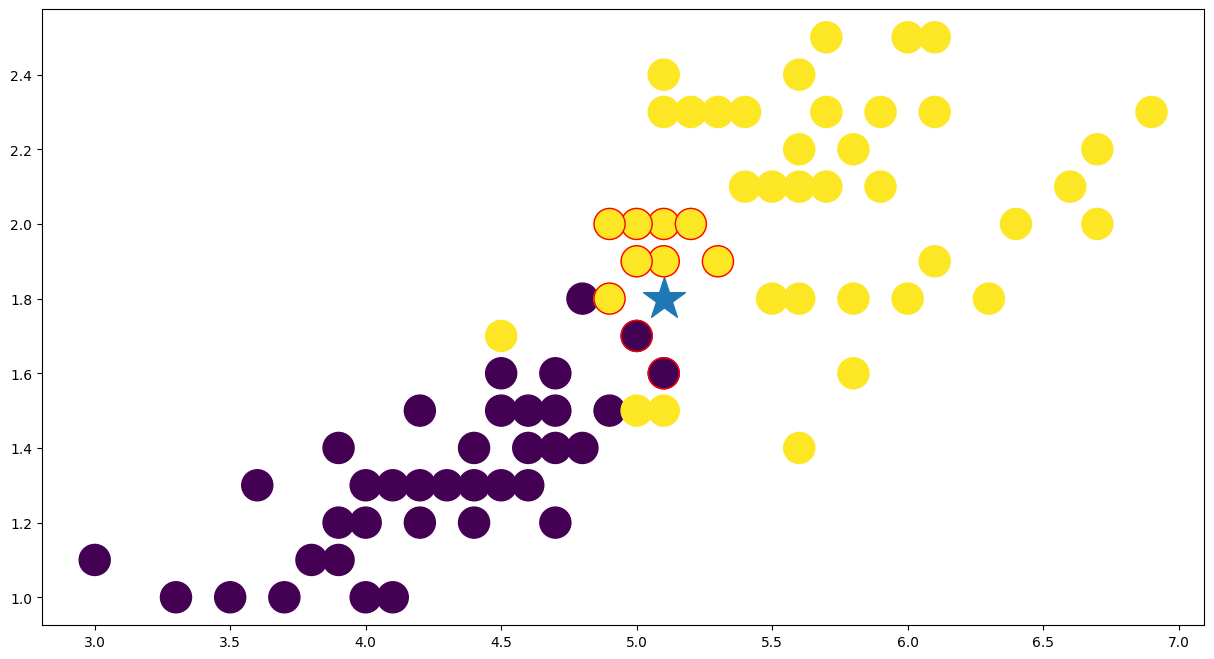

In [75]:
# 시각화
# 별은 입력값으로 준 test data임, test data와 가장 가까운 10개 데이터를 빨강색 표시됨
plt.figure(figsize=(15,8))
plt.scatter(train_data[:,0], train_data[:,1], c=train_target, s=500)
plt.scatter(test_data[0,0], test_data[0,1], marker="*", s=1000)
plt.scatter(euclid_neighbors[:,0], euclid_neighbors[:,1], c=euclid_neighbors_label, edgecolors="red", s=500)

3.2 Manhattan Distance

In [76]:
manhattan_knn = KNeighborsClassifier(n_neighbors=10, p=1)
manhattan_knn.fit(train_data, train_target)

KNeighborsClassifier(n_neighbors=10, p=1)

In [77]:
manhattan_neighbors_idx = manhattan_knn.kneighbors(
    test_data, n_neighbors=10, return_distance=False
).ravel()
manhattan_neighbors = train_data[manhattan_neighbors_idx]
manhattan_neighbors_label = train_target[manhattan_neighbors_idx]

In [78]:
manhattan_neighbors_label

array([2, 2, 2, 1, 1, 2, 2, 1, 2, 2])

In [79]:
manhattan_knn.predict_proba(test_data)

array([[0.3, 0.7]])

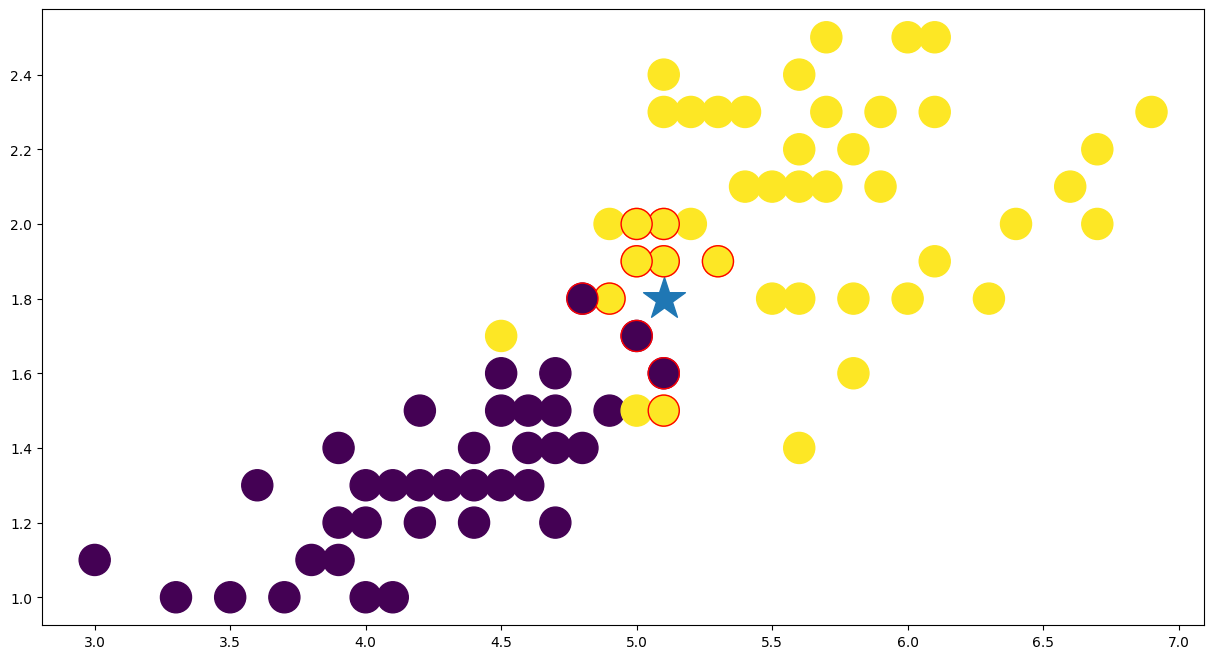

In [80]:

plt.figure(figsize=(15,8))
plt.scatter(train_data[:,0], train_data[:,1], c=train_target, s=500)
plt.scatter(test_data[0,0], test_data[0,1], marker="*", s=1000)
plt.scatter(manhattan_neighbors[:,0], manhattan_neighbors[:,1], c=manhattan_neighbors_label, edgecolors="red", s=500)


In [81]:
euclid_neighbors_idx

array([37, 76, 21, 59, 25, 46, 49, 47, 77, 57])

In [82]:
manhattan_neighbors_idx

array([37, 59, 76, 21, 25, 46, 49, 17, 67, 47])

In [83]:
set(euclid_neighbors_idx) - set(manhattan_neighbors_idx)

{57, 77}

In [84]:
# set() 각 집합의 차집합만 뽑아냄
# 교집합을 뺌
diff_neighbors_idx = list(set(euclid_neighbors_idx) - set(manhattan_neighbors_idx))
diff_neighbors_idx.extend(list(set(manhattan_neighbors_idx) - set(euclid_neighbors_idx)))
diff_neighbors_idx

[57, 77, 17, 67]

In [85]:
diff_neighbors = train_data[diff_neighbors_idx]
diff_neighbors_label = train_target[diff_neighbors_idx]

In [86]:
# &교집합
same_neighbors_idx = list(set(euclid_neighbors_idx) & set(manhattan_neighbors_idx))
same_neighbors_idx

[37, 76, 46, 47, 49, 21, 25, 59]

In [87]:
same_neighbors = train_data[same_neighbors_idx]
same_neighbors_label = train_target[same_neighbors_idx]

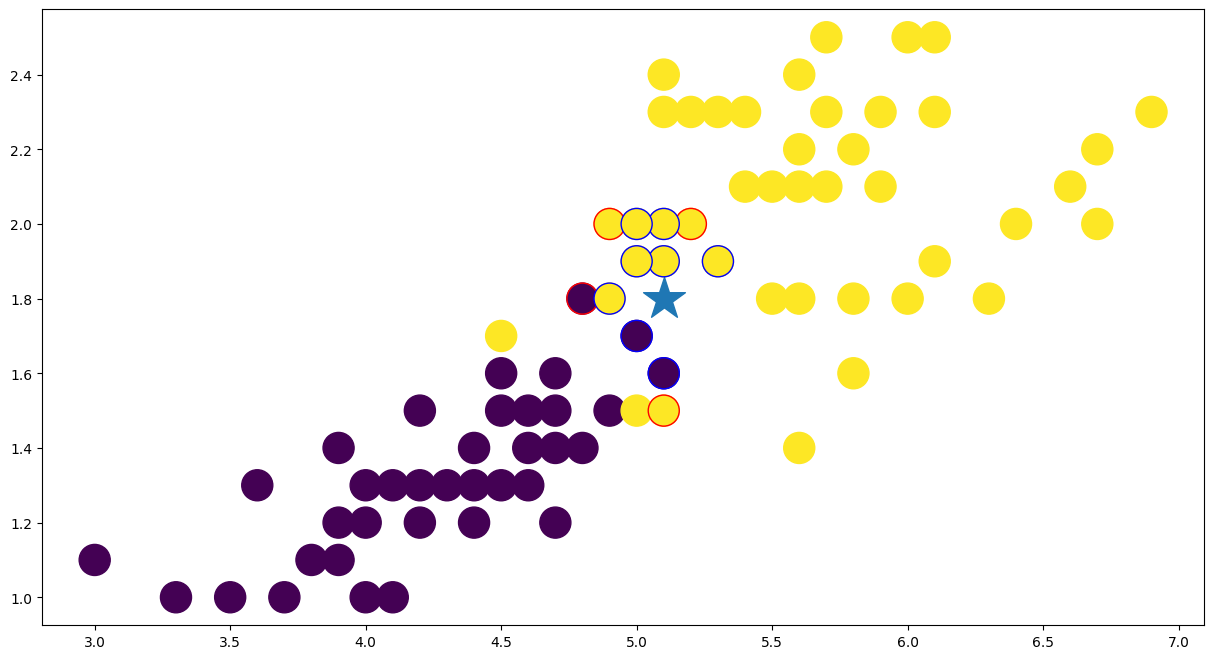

In [90]:
# 파란색이 교집합(같은 이웃), 빨간색이 차집합(다른 이웃)
plt.figure(figsize=(15, 8))
plt.scatter(train_data[:,0], train_data[:,1], c=train_target, s=500)
plt.scatter(test_data[0,0], test_data[0,1], marker="*", s=1000)
plt.scatter(diff_neighbors[:,0], diff_neighbors[:,1], c=diff_neighbors_label, edgecolors="red", s=500)
plt.scatter(same_neighbors[:,0], same_neighbors[:,1], c=same_neighbors_label, edgecolors="blue", s=500)